<a href="https://colab.research.google.com/github/NugPath23/DIF62130_Kelas-B_25_2311531008/blob/main/praktikum5/Dimentionality_Reduction_Tugas_Praktikum_ML_17_Juni_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dimensionality Reduction
**Principal Component Analysis (PCA)**
* Salah satu teknik reduksi dimensi yang digunakan dalam machine learning dan statistika untuk mengubah data berdimensi tinggi menjadi dimensi yang lebih rendah dengan tetap mempertahankan sebanyak mungkin informasi yang ada di dalam data.
* PCA sering digunakan dalam kasus di mana data memiliki banyak fitur, sehingga sulit untuk divisualisasikan atau menyebabkan computational cost yang tinggi dalam pemrosesan machine learning. Pertama kali diperkenalkan oleh Karl Pearson pada tahun 1901.
* Ide utama dari PCA adalah melakukan transformasi linier pada data ke sistem koordinat baru sehingga arah (principal component) data baru dapat merepresentasikan variansi terbesar pada data.
* PCA "menggabungkan" data yang saling berkorelasi menjadi principal component (PC)







In [ ]:
from sklearn.datasets import load_iris #mengambil dataset bunga iris yang sudah tersedia di scikit-learn. Dataset ini berisi data pengukuran 150 bunga iris dari 3 spesies berbeda.

iris = load_iris()
x = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

Number of samples: 150
Number of features: 4


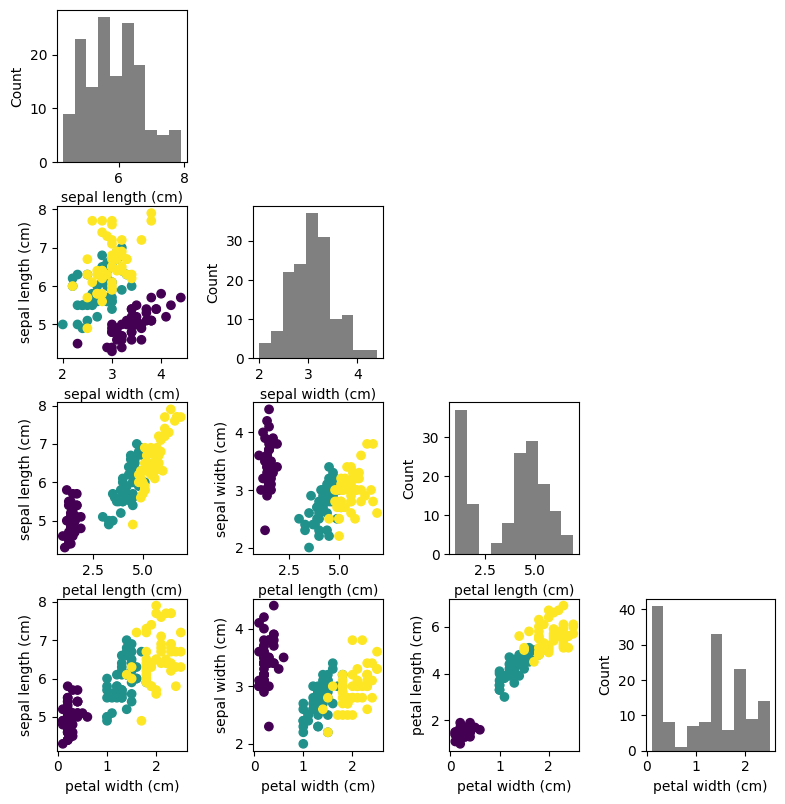

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip (*np.triu_indices(n_features, k=1)):
    ax[j, i].scatter(x[:, j], x[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(x[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])

# Langkah 1 : Standarisasi Data



Langkah ini bertujuan untuk memastikan bahwa algoritma—terutama yang berbasis pada perhitungan jarak—dapat bekerja secara optimal dalam mengolah data. Jika data tidak dinormalisasi, nilai-nilai yang besar dapat memberikan pengaruh lebih besar terhadap hasil algoritma. Oleh karena itu, penting untuk menyamakan skala semua fitur agar setiap fitur memiliki kontribusi yang seimbang. Salah satu metode yang digunakan adalah standarisasi data, yaitu dengan menghitung nilai Z-score, yang dilakukan dengan cara mengurangkan nilai rata-rata kolom dari setiap data (x), lalu membaginya dengan simpangan baku (σ) dari kolom tersebut.


In [ ]:
import numpy as np

def mean(x):
  return np.mean(x, axis=0) # Calculate mean for each feature

def std(x):
  return np.std(x, axis=0) # Calculate standard deviation for each feature

def Standardize(x):
  return (x - mean(x)) / std(x)

X_std = Standardize(x) # Calculate the standardized data

In [ ]:
import numpy as np

def mean(x):
  return np.mean(x, axis=0) # Calculate mean for each feature

def std(x):
  return np.std(x, axis=0) # Calculate standard deviation for each feature

def Standardize(x):
  return (x - mean(x)) / std(x)

X_std = Standardize(x) # Calculate the standardized data

# Langkah 2: Hitung covariance matrix

In [ ]:
import numpy as np

def covariance(x):
  # Calculate the covariance matrix
  # Divide by n_samples - 1 for sample covariance
  return (x.T @ x) / (x.shape[0] - 1)

cov_mat = covariance(X_std) # Calculate the covariance matrix

In [ ]:
display(cov_mat) # Display the covariance matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# Langkah 3: Hitung eigenvectors dan eigenvalues dari covariance matrix

In [ ]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)

signs = np.sign(eig_vecs [max_abs_idx, range(eig_vecs.shape[0])])

eig_vecs = eig_vecs*signs [np.newaxis,:]

eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n',eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


# Langkah 4: Urutkan eigenvectors dan eigenvalues#

In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


# Langkah 5 : Pilih principal components (PC)
Pilih k eigenvektor pertama di mana k adalah jumlah dimensi subruang fitur baru (k =< nfeatures)

Perhatikan bahwa nilai k dapat diatur dengan cara yang lebih bijak melalui varians yang dijelaskan (explained variance) Explained variance memberi tahu kita seberapa banyak informasi (variance) yang dapat dikaitkan dengan masing-masing komponen utama (principal components).

In [ ]:
#select top k eigenvecctors
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


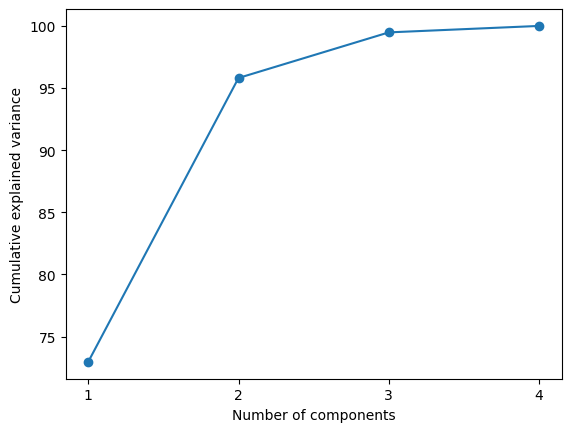

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features + 1), cum_explained_variance, 'o-')
plt.xticks(np.arange(1, n_features + 1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

# Langkah 6: Proyeksikan Data

In [ ]:
X_proj = X_std.dot(W.T)

print(X_proj.shape) #dimensi data hasil transformasi
print(X.shape)      #dimensi data awal

(150, 2)
(150, 4)


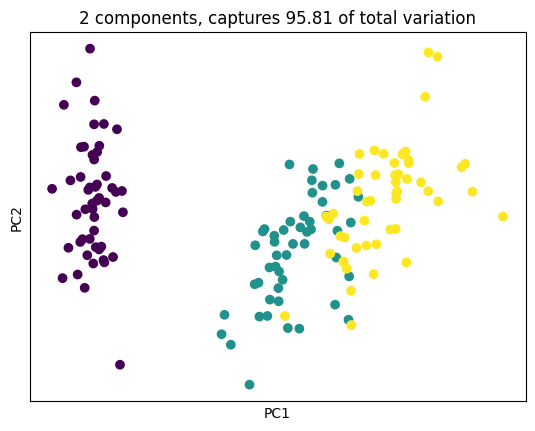

In [ ]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

# **PCA dengan sklearn**

# 1.Import Library & Dataset

In [1]:
from sklearn.datasets import load_iris  # Import dataset Iris dari sklearn
from sklearn.preprocessing import StandardScaler  # Untuk menstandarisasi fitur
from sklearn.decomposition import PCA  # Import PCA dari sklearn
import matplotlib.pyplot as plt  # Untuk membuat visualisasi

# Memuat dataset Iris
iris = load_iris()
X = iris.data       # Ambil data fitur (panjang/lebar sepal & petal)
y = iris.target     # Ambil label target (spesies bunga)

# 2. Standarisasi Data
PCA bekerja lebih baik jika data sudah distandarisasi.

In [2]:
scaler = StandardScaler()  # Membuat objek StandardScaler untuk standarisasi fitur (mean=0, std=1)
X_std = scaler.fit_transform(X)  # Menyesuaikan dan mentransformasi data X menjadi versi yang sudah distandarisasi

# 3. Terapkan PCA dan Tentukan Komponen Utama

In [3]:
pca = PCA(n_components=2) #PCA(n_components=2) berarti kita ingin mereduksi dimensi dari 4 → 2 dimensi.
X_pca = pca.fit_transform(X_std) #fit_transform() menyesuaikan PCA ke data dan langsung memproyeksikan data ke komponen baru.

# 4. Melihat Variansi yang Dijelaskan

In [4]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_) #menunjukkan proporsi variansi yang dijelaskan oleh masing-masing komponen.
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum()) #cumsum() menunjukkan akumulasi variansi yang dijelaskan. Ini penting untuk menentukan apakah 2 komponen cukup.



Explained Variance Ratio: [0.72962445 0.22850762]
Cumulative Explained Variance: [0.72962445 0.95813207]


#
Pemanggilan PCA() tanpa argumen berarti kita tidak menentukan jumlah komponen utama yang diinginkan, sehingga PCA akan secara otomatis menghitung semua komponen sebanyak jumlah fitur dalam data (contohnya pada dataset Iris yang memiliki 4 fitur, maka dihasilkan 4 komponen).


Metode fit(X_std) akan melakukan perhitungan terhadap eigenvalue dan eigenvector dari matriks kovarian pada data yang telah distandarisasi (X_std), dan menyimpan hasilnya ke dalam objek pca_full. Informasi seperti explained_variance_ratio_ bisa diakses dari objek ini, yang menunjukkan seberapa besar kontribusi masing-masing komponen utama dalam menjelaskan variasi data.


Fungsi cumsum() digunakan untuk menghitung akumulasi total variansi yang dijelaskan oleh komponen-komponen utama secara bertahap.


range(1, ...) berfungsi untuk memberikan label sumbu-x mulai dari angka 1, sesuai dengan urutan komponen (komponen ke-1, ke-2, dan seterusnya).

Parameter marker='o' digunakan untuk memberi simbol titik bulat pada plot, sedangkan linestyle='--' menampilkan garis antar titik dalam bentuk putus-putus.

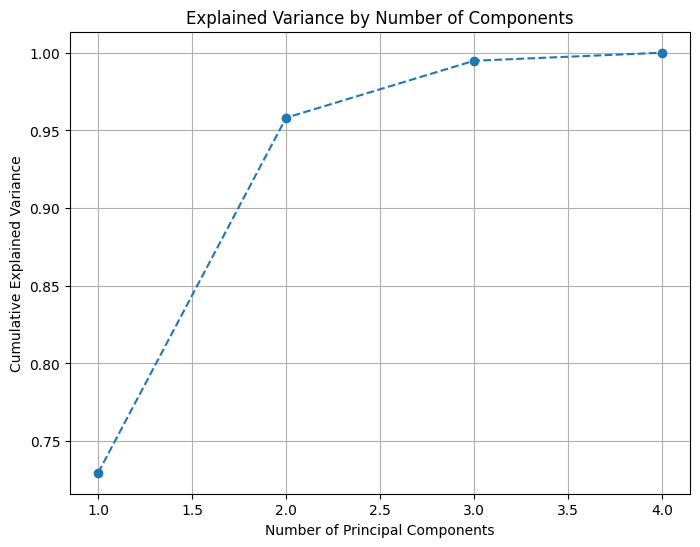

In [5]:
# Membuat objek PCA tanpa menetapkan jumlah komponen terlebih dahulu
pca_full = PCA()

# Melatih PCA menggunakan data yang sudah distandarisasi
pca_full.fit(X_std)

# Membuat figure baru untuk visualisasi
plt.figure(figsize=(8, 6))

# Plot garis akumulasi variansi yang dijelaskan oleh jumlah komponen utama
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),  # 1 sampai jumlah fitur (4)
    pca_full.explained_variance_ratio_.cumsum(),  # Akumulasi variansi yang dijelaskan
    marker='o',
    linestyle='--'
)

# Label dan judul plot
plt.xlabel('Number of Principal Components')  # Sumbu x: jumlah komponen
plt.ylabel('Cumulative Explained Variance')  # Sumbu y: akumulasi variansi (%)
plt.title('Explained Variance by Number of Components')  # Judul grafik
plt.grid(True)  # Tambahkan grid agar lebih mudah dibaca
plt.show()  # Tampilkan plot

# 6. Visualisasi Hasil Proyeksi PCA
Menampilkan visualisasi hasil reduksi dimensi dari ruang berdimensi 4 ke 2 (4D → 2D), di mana setiap titik data diberi warna berdasarkan label kelas (y). Sumbu horizontal dan vertikal masing-masing merepresentasikan komponen utama pertama (PC1) dan komponen utama kedua (PC2).

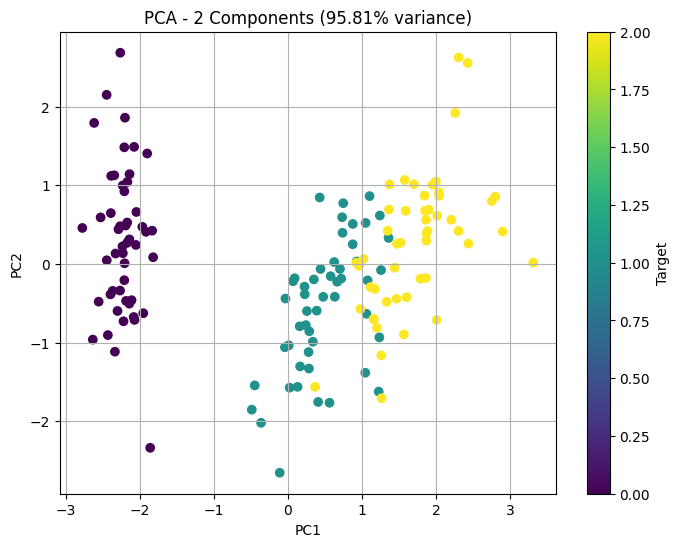

In [6]:
plt.figure(figsize=(8, 6))  # Membuat canvas figure dengan ukuran 8x6 inci

# Scatter plot hasil reduksi dimensi PCA ke 2 komponen utama
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)  # PC1 di sumbu x, PC2 di sumbu y, warna sesuai target kelas (y)

plt.xlabel('PC1')  # Label sumbu x: Principal Component 1
plt.ylabel('PC2')  # Label sumbu y: Principal Component 2

# Judul grafik menampilkan total persentase variansi dari 2 komponen utama
plt.title(f'PCA - 2 Components ({round(sum(pca.explained_variance_ratio_)*100, 2)}% variance)')

plt.colorbar(label='Target')  # Tambahkan colorbar untuk menunjukkan label target (kelas)
plt.grid(True)  # Tambahkan grid agar grafik lebih mudah dibaca
plt.show()  # Tampilkan plot